In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

## Question 1

In [2]:
def f_question(t,s):
    return s

In [3]:
def f(t, s):
    return np.exp(t)

In [8]:
# Runge-Kutta from question 1.
def rk4(f, t0, x0, tau, n, output = False):
    traj = np.zeros(n+1)
    tt = []
    h = ((tau - t0) / n)
    
    traj[0] = x0
    
    t = t0
    tt.append(t)
    for ii in range(n):
        
        K1 = h * f(t, traj[ii])
        K2 = h * f(t + h/2, traj[ii] + K1/2)
        K3 = h * f(t + h/2, traj[ii] + K2/2)
        K4 = h * f(t + h, traj[ii] + K3)
        
        traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)
        t =  t + h

        if output == True:
            print(traj[ii+1], t, h)
        tt.append(t)
    
    return traj, tt

In [11]:
table = np.zeros((len(N), 6))
t0 = 0
x0 = 1
tau = 5
N = [1, 2, 4, 8, 16, 32, 64]

In [12]:
sols = []
times = []
prev_sol = 1
for i, n in enumerate(N):
    h = ((tau - t0) / n)
    sol, time = rk4(f_question, t0, x0, tau, n, False)
    sols.append(sol)
    times.append(time)
    
    table[i,0] = n
    table[i,1] = h
    table[i,2] = sol[-1]
    table[i,3] = abs(sol[-1] - np.exp(1))
    table[i,4] = abs(sol[-1] - prev_sol)
    if i>1:
        table[i,5] = abs(sol[-1] - prev_sol) / abs(prev_sol - table[i-2,5])
    prev_sol=sol[-1]

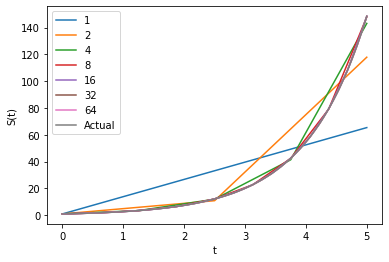

In [13]:
for ii in range(len(sols)):
    
    plt.plot(times[ii], sols[ii], label = N[ii])

plt.plot(np.linspace(0,5,100), np.exp(np.linspace(0,5,100)), label = 'Actual')    
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.savefig("figures/various_grids.pdf",dpi=300)  
plt.show()

# Question 2

In [14]:
N = [1, 2, 4, 8, 16, 32, 64]
tau = 1

In [15]:
# coluumns:
# n, h, sol, sol-e, sol-prev_sol, abs(sol)/abs(prev_sol)

table = np.zeros((len(N), 6))

In [16]:
sols = []
times = []
prev_sol = 1
for i, n in enumerate(N):
    h = ((tau - t0) / n)
    sol, time = rk4(f_question, t0, x0, tau, n, False)
    sols.append(sol)
    times.append(time)
    
    table[i,0] = n
    table[i,1] = h
    table[i,2] = sol[-1]
    table[i,3] = abs(sol[-1] - np.exp(1))
    table[i,4] = abs(sol[-1] - prev_sol)
    if i>1:
        table[i,5] = abs(sol[-1] - prev_sol) / abs(prev_sol - table[i-2,5])
    prev_sol=sol[-1]

In [17]:
df = pd.DataFrame(table)
df.columns = ['n', 'h','s(1)', 's(1) - e', 'diff', 'ratio']
df

,n,h,s(1),s(1) - e,diff,ratio
0,1.0,1.000000,2.708333,9.948495e-03,1.708333e+00,0.000000e+00
1,2.0,0.500000,2.717346,9.356371e-04,9.012858e-03,0.000000e+00
2,4.0,0.250000,2.718210,7.188926e-05,8.637478e-04,3.178645e-04
3,8.0,0.125000,2.718277,4.984042e-06,6.690522e-05,2.461370e-05
4,16.0,0.062500,2.718282,3.281185e-07,4.655924e-06,1.713022e-06
5,32.0,0.031250,2.718282,2.104785e-08,3.070706e-07,1.129660e-07
6,64.0,0.015625,2.718282,1.332718e-09,1.971514e-08,7.252798e-09


In [ ]:
df.to_latex()

# Question 3

In [18]:
from scipy import integrate

In [670]:
def f(x1, x2, lmbda = .25, mu = .55):
    return np.array([-x2 , lmbda - mu*x2 - x1**2 - x1*x2])

C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\373768958.py:13: RuntimeWarning: invalid value encountered in true_divide
  U = u / np.sqrt(u**2 + v**2);
C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\373768958.py:14: RuntimeWarning: invalid value encountered in true_divide
  V = v / np.sqrt(u**2 + v**2);


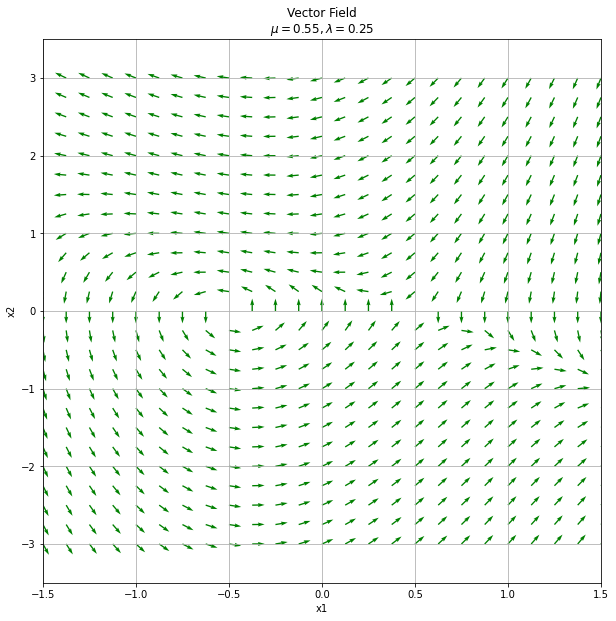

In [675]:
# Meshgrid
n = 25
x_max = 1.5
x_min = -1.5

x, y = np.meshgrid(np.linspace(x_min, x_max, n), 
                   np.linspace(-3, 3, n))
  
# Directional vectors
u = f(x,y)[0]
v = f(x,y)[1]

U = u / np.sqrt(u**2 + v**2);
V = v / np.sqrt(u**2 + v**2);
  
# Plotting Vector Field with QUIVER
plt.figure( figsize = (10, 10))
#plt.quiver(x, y, u, v, color='g')
plt.quiver(x, y, U, V, color='g')
#lt.quiver(x, y, np.ones(len(u)), np.ones(len(v)), color='g')
plt.title('Vector Field\n$\mu=0.55, \lambda=0.25$')
plt.xlabel('x1')
plt.ylabel('x2')
  
# Setting x, y boundary limits
plt.xlim(x_min, x_max)
plt.ylim(-3.5, 3.5)
plt.savefig("figures/vector_field_55_25.pdf",dpi=300)  
# Show plot with grid
plt.grid()
plt.show()

In [ ]:
# Stable point = x1 = +sqrt(lambda) x2=0

In [ ]:
# Flikker in runga kutta
rk4(f, t0, x0, tau, n)

#### A) Steady states in vector field

$$
\dot{s} = f(x), 
f(x) = \begin{pmatrix}
-x_2 \\
\lambda - \mu x_2 -x_{1}^{2}-x_{1}x_2
\end{pmatrix}
$$

For a state to be a steady state, the derivative has to be 0. Hence, 
$$
f(x1,x2) = \begin{pmatrix}
0 \\
0
\end{pmatrix}
$$
Thus x2=0. 
$$
\lambda - \mu x_2 - x_{1}^{2}-x_1x_2 = 0 \\
x_2 = 0 \\
x_{1}^{2} = \lambda \\
x_{1}= \pm \sqrt{\lambda}
$$

### B) Region where there are no and 2 steady states
2 steady states:
$$
 \lambda>0
$$

What is lambda = 0? -> 1 steady state <br>
No steady states:
$$
\lambda <0
$$


In [26]:
def give_steady_states(mu, lam):
    return np.array([[-np.sqrt(lam), 0], [np.sqrt(lam), 0]]) 

In [29]:
give_steady_states(1, 53)

array([[-7.28010989,  0.        ],
       [ 7.28010989,  0.        ]])

### C) Stability for the two steady states 

Theory:
$$
s = \bar{x}+y \\
\dot{s} = \dot{y}\\
$$

Taylor Expand
$$
\dot{y} = f(\bar{x})+\frac{\partial f}{\partial{x}}(\bar{x})y+R(y)
$$

Define A
$$
A = \frac{\partial f}{\partial{x}}(\bar{x})
$$

Look at the real part of the eigenvalues to determine the dynamics around the stable points

In our case:
$$
\bar{x} = \begin{pmatrix}
\pm\sqrt{\lambda} \\
0
\end{pmatrix},
A = \begin{pmatrix}
\frac{\partial{f_1}}{\partial{x_1}} & \frac{\partial{f_1}}{\partial{x_2}}\\
\frac{\partial{f_2}}{\partial{x_1}} & \frac{\partial{f_2}}{\partial{x_2}}
\end{pmatrix} = \begin{pmatrix}
0 & 1\\
-2x_1-x_2 & -\mu-x_1
\end{pmatrix}
$$

Then, the eigenvalues are:
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
-2x_1-x_2 & -\mu-x_1-\kappa
\end{pmatrix}
$$

Considered at the positive stable point
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
-2\sqrt{\lambda} & -\mu-\sqrt{\lambda}-\kappa
\end{pmatrix}\\
=-\kappa(-\mu-\sqrt{\lambda}-\kappa)+2\sqrt{\lambda}\\
=\kappa^2-\kappa\mu-\kappa\sqrt{\lambda}+2\sqrt{\lambda}
$$

Solve for $\kappa$
$$
\kappa=\frac{1}{2}(-\sqrt{\lambda}-\mu\pm\sqrt{\lambda+\mu^2+2\sqrt{\lambda}(4+\mu)})
$$

Considered at the negative stable point
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
2\sqrt{\lambda} & -\mu+\sqrt{\lambda}-\kappa
\end{pmatrix}\\
=-\kappa(-\mu+\sqrt{\lambda}-\kappa)-2\sqrt{\lambda}\\
=\kappa^2-\kappa\mu+\kappa\sqrt{\lambda}-2\sqrt{\lambda}
$$

Solve for $\kappa$
$$
\kappa=\frac{1}{2}(-\sqrt{\lambda}-\mu\pm\sqrt{\lambda+\mu^2-2\sqrt{\lambda}(4+\mu)})
$$


In [87]:
# stability of parameter space
def point1_eigenvalues(mu, lam):
    return [0.5*(-np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu), 0.5*(np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu)]

def point2_eigenvalues(mu, lam):
    if lam<0:
        return [np.nan, np.nan]
    elif (-2*np.sqrt(lam)*mu-7*lam+mu**2)<0:
        return[f"{0.5*(np.sqrt(lam)-mu)} + j",f"{0.5*(np.sqrt(lam)-mu)} + j"]
    return [0.5*(-np.sqrt(-2*np.sqrt(lam)*mu-7*lam+mu**2)+np.sqrt(lam)-mu), 0.5*(np.sqrt(-2*np.sqrt(lam)*mu-7*lam+mu**2)+np.sqrt(lam)-mu)]

In [43]:
point1_eigenvalues(1,1)

[-2.732050807568877, 0.7320508075688772]

In [44]:
point2_eigenvalues(1,1)

['j', 'j']

In [125]:
mus=np.linspace(-20,20)
lambdas=np.linspace(-20,20)

In [126]:
point1_eigenvalues(mus,1)

[array([ -0.10468636,  -0.10933141,  -0.11440501,  -0.11996889,
         -0.12609712,  -0.13287936,  -0.14042512,  -0.14886952,
         -0.15838111,  -0.16917276,  -0.181517  ,  -0.19576796,
         -0.2123937 ,  -0.23202449,  -0.25552719,  -0.28412222,
         -0.31957312,  -0.36450121,  -0.42291871,  -0.50113608,
         -0.60925083,  -0.76324561,  -0.9865174 ,  -1.30641606,
         -1.74076012,  -2.28386989,  -2.91143603,  -3.59685729,
         -4.32009558,  -5.06809498,  -5.83269083,  -6.60875147,
         -7.39297603,  -8.1831793 ,  -8.97787198,  -9.77601099,
        -10.57684736, -11.37983116, -12.18455045, -12.99069109,
        -13.79800967, -14.60631483, -15.41545422, -16.22530506,
        -17.0357674 , -17.84675904, -18.65821182, -19.47006871,
        -20.2822817 , -21.09481005]),
 array([19.10468636, 18.29300488, 17.48175195, 16.67098929, 15.86079099,
        15.0512467 , 14.24246594, 13.4345838 , 12.62776886, 11.82223399,
        11.01825169, 10.21617613,  9.41647533,  

In [50]:
point1_eigenvalues(1,lambdas)

C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\1498077924.py:3: RuntimeWarning: invalid value encountered in sqrt
  return [0.5*(-np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu), 0.5*(np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu)]


[array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
        -2.21558735, -2.87606668, -3.29554318, -3.62332391, -3.89961401,
        -4.14203967, -4.36012445, -4.55967946, -4.74454815, -4.9174234 ,
        -5.08027558, -5.23459606, -5.38154485, -5.52204454, -5.6568428 ,
        -5.78655519, -5.91169551, -6.03269766, -6.14993197, -6.26371738,
        -6.37433086, -6.48201469, -6.5869822 , -6.68942237, -6.78950354]),
 array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        n

In [ ]:
## stability steady state x1=np.sqrt(lam)
## The steady state has a negative and a positive eigenvalue for all values of mu and lambda greater than 0. 
## This steady state is an unstable saddle point

In [141]:
for mu in mus:
    print(point2_eigenvalues(mu,1))

[0.3542486889354093, 5.645751311064591]
[0.3684992748713154, 5.427419092475624]
[0.38403953190184703, 5.207797202792031]
[0.40106786421870755, 4.9866872378221085]
[0.4198289862480711, 4.763844483139684]
[0.4406293279900053, 4.538962508744689]
[0.4638594636752762, 4.311650740406356]
[0.4900278442890664, 4.0814007271395045]
[0.5198135531364034, 3.8475333856391067]
[0.5541528652110832, 3.6091124409113657]
[0.5943901041099333, 3.3647935693594544]
[0.6425620187422638, 3.1125400220740627]
[0.7019942587887829, 2.8490261493744824]
[0.7787628482945724, 2.568175927215632]
[0.8863097823838972, 2.2565473604732453]
[1.0705138717205704, 1.868261638483511]
['1.3673469387755102 + j', '1.3673469387755102 + j']
['1.2653061224489797 + j', '1.2653061224489797 + j']
['1.163265306122449 + j', '1.163265306122449 + j']
['1.0612244897959182 + j', '1.0612244897959182 + j']
['0.9591836734693877 + j', '0.9591836734693877 + j']
['0.8571428571428572 + j', '0.8571428571428572 + j']
['0.7551020408163263 + j', '0.7551

In [64]:
for lam in lambdas:
    print(point2_eigenvalues(1,lam))

[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[0.18056172 1.77056375]
[0.05328334 3.12802844]
[0.21428571 4.01781746]
[0.34515425 4.73081568]
[0.45831485 5.34299028]
[0.55945693 5.88781786]
[0.65175111 6.38356182]
[0.73717915 6.84148079]
[0.81707778 7.26909483]
[0.89239919 7.67172152]
[0.96385011 8.05328507]
[1.03197218 8.41677934]
[1.09719141 8.76455002]
[1.15985001 9.09847554]
[1.2202278  9.42008779]
[1.27855709 9.73065552]
[ 1.33503323 10.03124355]
[ 1.38982237 10.3227559 ]
[ 1.44306722 10.60596788]
[ 1.49489143 10.88155031]
[ 1.54540301 11.1500883 ]
[ 1.5946969 11.4120958]
[ 1.64285714 11.66802713]
[ 1.68995853 11.9182863 ]
[ 1.73606798 12.16323443]


In [ ]:
## The steady state has two positive eigenvalues for mu< 

In [108]:
def complex_part(mu, lam):
    return -2*np.sqrt(lam)*mu-7*lam+mu**2
def real_part(mu,lam):
    return 0.5*(np.sqrt(lam)-mu)

Text(0.5, 1.0, 'parameter space $\\mu$ for $\\lambda=1$')

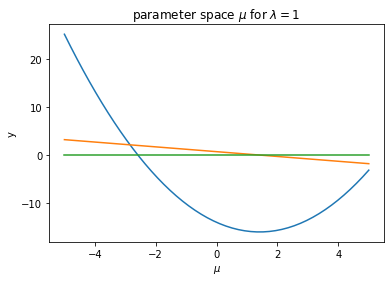

In [760]:
mus=np.linspace(-5,5)
plt.plot(mus, complex_part(mus,np.ones(len(mus))*2))
plt.plot(mus, real_part(mus,np.ones(len(mus))*2))
plt.plot(mus, np.zeros(len(mus)))
plt.xlabel("$\mu$")
plt.ylabel("y")
plt.title("parameter space $\mu$ for $\lambda=1$")
#plt.savefig("figures/parameter_space.pdf", dpi=300)

## Question 4

In [145]:
lambdas = 0.25
mus = [0.55, 0.45, 0.35]
t0 = 0
T = 160
N = 64

In [772]:
def ff(x,t, lam=0.25,mu=.45):
    x1=x[0]
    x2=x[1]
    return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])

In [775]:
res55 = integrate.odeint(ff, np.array([0.5,0]), np.linspace(0,10,10000000),(0.25,0.55))
res45 = integrate.odeint(ff, np.array([0.5,0]), np.linspace(0,10,100000),(0.25,0.45))
res35 = integrate.odeint(ff, np.array([0.5,0]), np.linspace(0,10,100000),(0.25,0.35))

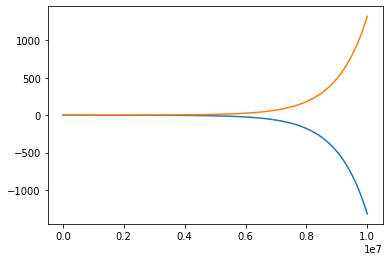

In [776]:
plt.plot(res55[:,1])
plt.plot(res55[:,0])

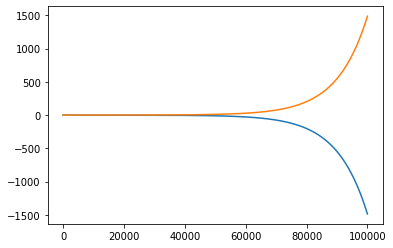

In [777]:
plt.plot(res45[:,1])
plt.plot(res45[:,0])

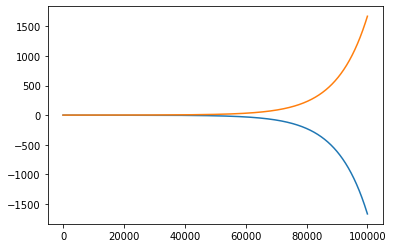

In [778]:
plt.plot(res35[:,1])
plt.plot(res35[:,0])

In [704]:
res = integrate.RK45(ff, 0, np.array([-0.5,0]), 160)

In [705]:
for i in range(160):
    res.step()
    sol = res.dense_output()
    print(sol(0))

[-0.5  0. ]
[-5.00000000e-01 -2.21834703e-13]
[-5.00000007e-01 -2.52907361e-08]
[-5.0007540e-01 -2.7613707e-04]
[-0.50721182 -0.01857518]
[-0.55270781 -0.11267134]
[-0.62014825 -0.25927803]
[-0.43598628  0.35570954]
[0.25363581 2.81594101]
[1.2331377  6.63248455]
[ 3.69555485 16.9107454 ]
[ 9.46383127 42.7015214 ]
[ 22.7489414  106.45620313]
[ 52.91990823 263.14469569]
[120.55414213 648.00463308]
[ 269.88290263 1592.6341753 ]
[ 593.56090135 3901.96009472]
[1280.77554682 9500.71613241]
[ 2708.93127133 22902.80571683]
[ 5614.92123355 54443.7334828 ]
[ 8352.93194509 90588.58554507]
[ 14492.15718366 178940.92945177]
[ 24738.96786635 346721.03928522]
[ 48134.68414008 772080.9328123 ]
[  81126.85653453 1461843.39203869]
[ 122974.61315781 2477332.20012563]
[ 207276.55017889 4645494.49023914]
[ 370132.41339859 9223983.39236954]
[  595683.84038192 16262323.51973392]
[  737234.97119697 21917936.83131495]
[ 1149495.33157672 37155329.60445523]
[ 2113898.07035067 74315121.39036359]
[3.10241157e+06 

In [342]:
def ff(t, x,mu,lam):
    x1=x[0]
    x2=x[1]
    return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])

In [325]:
def rk4(func, t0, x0, tau, n, args=None, output = False):
    traj = np.zeros((n+1, len(x0)))
    tt = []
    h = ((tau - t0) / n)
    
    traj[0] = x0
    
    t = t0
    tt.append(t)
    for ii in range(n):
        
        if args:
            K1 = h * func(t, traj[ii],**args)
            K2 = h * func(t + h/2, traj[ii] + K1/2,**args)
            K3 = h * func(t + h/2, traj[ii] + K2/2,**args)
            K4 = h * func(t + h, traj[ii] + K3,**args)
        else:
            K1 = h * func(t, traj[ii])
            K2 = h * func(t + h/2, traj[ii] + K1/2)
            K3 = h * func(t + h/2, traj[ii] + K2/2)
            K4 = h * func(t + h, traj[ii] + K3)
        
        #traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)
        traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)
        t =  t + h

        if output == True:
            print(traj[ii+1], t, h)
        tt.append(t)
    
    return traj, tt

In [310]:
x0=[0.499999, 0]

In [311]:
N=20000

In [366]:
args={'mu':0.55, 'lam':0.25}
sol55, time = rk4(ff, t0, x0, 160, N, args)

args={'mu':0.45, 'lam':0.25}
sol45, time = rk4(ff, t0, x0, 160, N, args)
args={'mu':0.35, 'lam':0.25}
sol35, time = rk4(ff, t0, x0, 160, N, args)

C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\1424710261.py:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\1424710261.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\3704159393.py:23: RuntimeWarning: invalid value encountered in add
  traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)


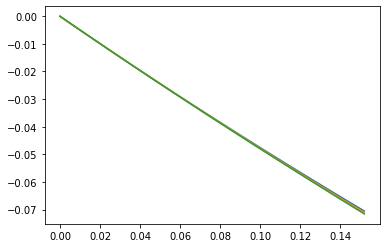

In [368]:
plt.plot(time[:20], sol55[:20,1])
plt.plot(time[:20], sol45[:20,1])
plt.plot(time[:20], sol35[:20,1])

In [351]:
## B

In [357]:
v1 = np.array([-.52,0.86]); v2 = np.array([-0.86, 0.52]); h=10e-6;xbar=np.array([0.5,0])

N = 10000

In [362]:
args={'mu':0.35, 'lam':0.25}
solplus_35, tt = rk4(ff, 0, xbar+h*v1, 20, N, args)

C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\1424710261.py:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_20616\1424710261.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])


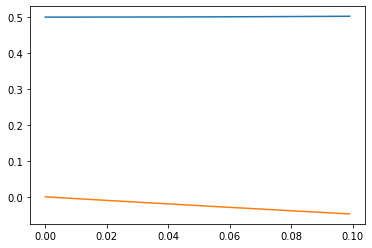

In [365]:
plt.plot(tt[:100],solplus_35[:100])